# **Midterm Test 2 - Question**

Aug 26, 2024

---



## **Bài thi giữa kỳ**
## Bài thi giữa kỳ

- Dataset sử dụng:
    - Students Performance in Exams
    - './StudentsPerformance.csv'
    - https://www.kaggle.com/spscientist/students-performance-in-exams?select=StudentsPerformance.csv

- Loại câu hỏi:
    - Tìm hiểu dữ liệu
    - Bài toán Regression
    - Bài toán Classification

- Các câu hỏi trong đề thi sử dụng chung một tập dữ liệu, Students Performance in Exams. Tập dữ liệu này thống kê các loại điểm số của các sinh viên, cùng một vài đặc điểm của sinh viên đó, và được thể hiện qua bảng dưới đây.
- Để đảm bảo tính thống nhất trong các quá trình ngẫu nhiên, học viên chọn giá trị `random_state = 42`.

## **Cài đặt thư viện**

In [1]:
# Cài các thư viện
######################
# Code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

######################
random_state = 42

## **Phần 1. Tìm hiểu dữ liệu (3 điểm)**

### **Câu 1**(1 điểm): Sử dụng Pandas

1.1. (0.5 điểm) In ra mô tả số liệu của dữ liệu (*descriptive statistics*)

In [2]:
######################
# Code
data = pd.read_csv('StudentsPerformance.csv')
data.head()
######################

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1.2. (0.5 điểm) Kiểm tra xem dữ liệu có missing value không? Nếu có hãy điền theo giá trị trung bình (*mean*)

In [5]:
######################
# Code
data.isnull().sum()
######################

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### **Câu 2** (2 điểm): Visualization sử dụng Seaborn (2 điểm)

2.1. (0.5 điểm) Vẽ biểu đồ cột biểu thị mối quan hệ giữa hai trường `test preparation course` và `math score` với các giá trị của trường `gender`. Trong đó trục hoành của biểu đồ đại diện cho `test preparation course`, trục tung đại diện cho `math score`.

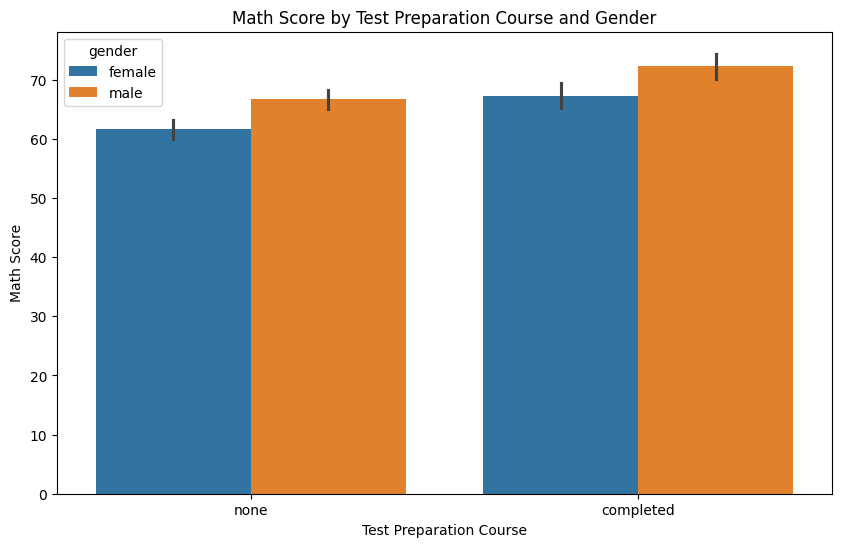

In [7]:
######################
# Gợi ý: barplot của Seaborn
# Code

plt.figure(figsize=(10, 6))
sns.barplot(x='test preparation course', y='math score', hue='gender', data=data)


plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.title('Math Score by Test Preparation Course and Gender')

plt.show()

2.2. (0.5 điểm)

- Tạo thêm một thuộc tính `total score` có giá trị bằng tổng của `math score`, `reading score`, `writing score`.
- Vẽ histogram biểu thị phân phối của các 4 thuộc tính điểm nêu trên.

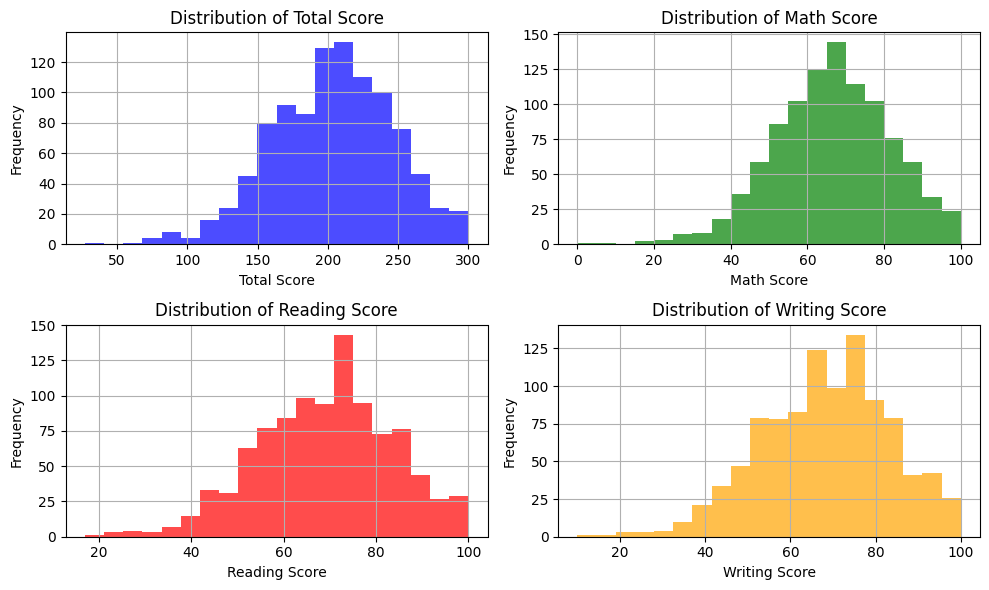

In [9]:
######################
# Gợi ý: histogram của Pandas
# Code
data['total score'] = data['math score'] + data['reading score'] + data['writing score']    

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
data['total score'].hist(bins=20, color='blue', alpha=0.7)
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Distribution of Total Score')
plt.subplot(2, 2, 2)
data['math score'].hist(bins=20, color='green', alpha=0.7)
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Distribution of Math Score')
plt.subplot(2, 2, 3)
data['reading score'].hist(bins=20, color='red', alpha=0.7)
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Distribution of Reading Score')
plt.subplot(2, 2, 4)
data['writing score'].hist(bins=20, color='orange', alpha=0.7)
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.title('Distribution of Writing Score')
plt.tight_layout()
plt.show()

######################

2.3. (0.5 điểm) Vẽ biểu đồ nhiệt (*heat map*) của ma trận tương quan (*correlation matrix*) giữa 4 trường được đề cập trong câu 2.2.

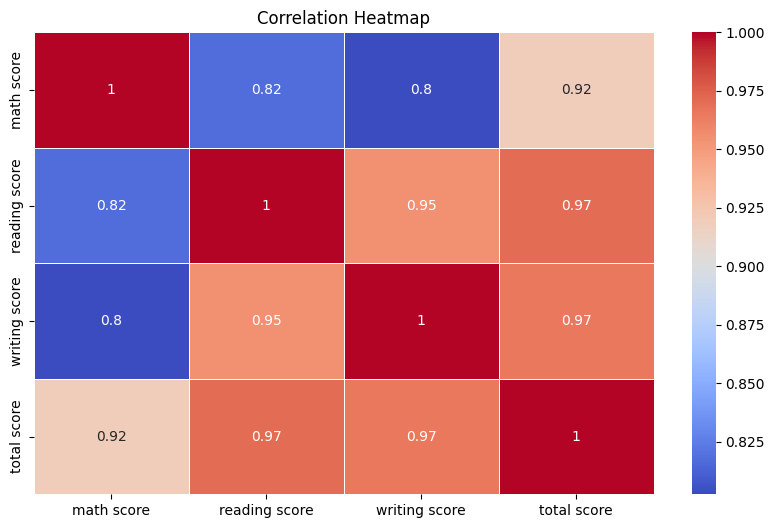

In [12]:
######################
# Gợi ý: heatmap của Seaborn
# Code  
plt.figure(figsize=(10, 6))
data_use = data[['math score', 'reading score', 'writing score', 'total score']]
sns.heatmap(data_use.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
######################

2.4. (0.5 điểm) In ra danh sách các sinh viên có 3 loại điểm (`math score`, `reading score`, `writing score`) lớn hơn 90, được sắp xếp theo thứ tự giảm dần của `total score`.

In [15]:
######################
# Gợi ý: sort_values để sắp xếp
data.sort_values(by='total score', ascending=False).head(20)

######################
# Code
######################

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
712,female,group D,some college,standard,none,98,100,99,297
179,female,group D,some high school,standard,completed,97,100,100,297
165,female,group C,bachelor's degree,standard,completed,96,100,100,296
625,male,group D,some college,standard,completed,100,97,99,296
685,female,group E,master's degree,standard,completed,94,99,100,293
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293


## **Phần 2. Regression (3 điểm)**

- **Bài toán**: Trong phần này, thuộc tính `math score` được tách ra để làm giá trị dự đoán. Hay nói cách khác, bài toán Regression ở đây được phát biểu là: **Dự đoán `math score` khi biết thông tin một số trường khác**.
- **Phương pháp**: Linear Regression và Ridge Regression.
- **Độ đo**: Mean Absolute Error (*MAE*), Root Mean Square Error (*RMSE*).
- **Chú ý**: Các câu hỏi dưới đây lần lượt nêu các bước để tạo dữ liệu và tạo mô hình huấn luyện


### **Câu 3** (1 điểm): Tạo một bản sao của dữ liệu gốc mà ở đó:

- Đưa `writing score`, `reading score` và `math score`về thang điểm `[0,1] `(giảm 100 lần)
- Tách cột `math score` làm target
- Bỏ cột `total score`
- **Label Encode** các thuộc tính Categorical
- Chia 2 tập **train, test** sử dụng train_test_split với **seed = random_state** và **tỉ lệ bằng 0.3**

In [30]:
######################
# Gợi ý: sử dụng Sklearn
# Code
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = data.drop(['total score', 'math score'], axis=1)
X[['reading score', 'writing score']] = X[['reading score', 'writing score']]/100
X['test preparation course'] = X['test preparation course'].map({'none': 0, 'completed': 1})
X['gender'] = X['gender'].map({'female':0, 'male':1})
for col in X.select_dtypes(include=[object]):
    X[col] = le.fit_transform(X[col])
y = data['math score']
######################

print(X.head())
print(y.head())


   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  reading score  writing score  
0                        0           0.72           0.74  
1                        1           0.90           0.88  
2                        0           0.95           0.93  
3                        0           0.57           0.44  
4                        0           0.78           0.75  
0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

### **Câu 4** (2 điểm): Huấn luyện

4.1. (1 điểm) Linear Regression:

*   In ra độ đo MAE và RMSE trên tập test.

In [33]:
######################
# Gợi ý: sử dụng Sklearn
# Code
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


MAE = np.mean(np.abs(y_test - y_pred))
RMSE = np.sqrt(np.mean((y_test - y_pred)**2))

print('Mean Absolute Error:', MAE)
print('Root Mean Squared Error:', RMSE)



######################

Mean Absolute Error: 4.4448579271518875
Root Mean Squared Error: 5.622367902633447


4.2. (1 điểm) Ridge Regression (1 điểm):

- Tìm kiếm tham số alpha thuộc khoảng `np.range(0, 1, 0.01)`.
- In ra giá trị alpha tối ưu tìm được.
- In ra độ đo MAE và RMSE trên tập test.

In [34]:
######################
# Gợi ý: sử dụng Sklearn
# Code
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha': np.arange(0, 1, 0.01)}
ridge_cv = GridSearchCV(ridge, param_grid=params, cv=5)
ridge_cv.fit(X_train, y_train)
y_pred = ridge_cv.predict(X_test)

MAE = np.mean(np.abs(y_test - y_pred))
RMSE = np.sqrt(np.mean((y_test - y_pred)**2))

print('Mean Absolute Error:', MAE)
print('Root Mean Squared Error:', RMSE)
print('Best alpha:', ridge_cv.best_params_)

######################

Mean Absolute Error: 4.440566335425572
Root Mean Squared Error: 5.621052046506027
Best alpha: {'alpha': np.float64(0.09)}


## **Phần 3. Classification (4 điểm)**

- Cột `test preparation course` được tách ra làm nhãn.
- Dữ liệu training bao gồm các trường: `math score`, `reading score` `gender` và `lunch`.
- Mô hình sử dụng:
    - Support Vector Machine (SVM)
    - Random Forest (RF)

### **Câu 5** (2 điểm): Tạo dữ liệu và nhãn

- Tách các trường dùng để train; Tách nhãn, đưa nhãn về `0,1`.
- Các trường mang thuộc tính phân loại (Category) cần được mã hóa phù hợp.
- Các trường mang thuộc tính giá trị (Numeric) cần được đưa về miền `[0,1]`.
- Chia dữ liệu với tỉ lệ tập test bằng 0.3 và giá trị random_state đã cho

(Mỗi ý 0.5 điểm)

In [40]:
######################
# Gợi ý: sử dụng Sklearn
# Dữ liệu training bao gồm các trường: `math score`, `reading score` `gender` và `lunch`.

# Code
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = data[['math score', 'reading score', 'gender', 'lunch']]
X[['reading score', 'math score']] = X[['reading score', 'math score']]/100
X['gender'] = X['gender'].map({'female':0, 'male':1})
for col in X.select_dtypes(include=[object]):
    X[col] = le.fit_transform(X[col])
y = data['test preparation course']
y = y.map({'none': 0, 'completed': 1})
######################

print(X.head())
print(y.head())

# Code
######################

   math score  reading score  gender  lunch
0        0.72           0.72       0      1
1        0.69           0.90       0      1
2        0.90           0.95       0      1
3        0.47           0.57       1      0
4        0.76           0.78       1      1
0    0
1    1
2    0
3    0
4    0
Name: test preparation course, dtype: int64


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

### **Câu 6** (2 điểm): Huấn luyện

- Sử dụng **GridSearchCV**, độ đo đánh giá là **accuracy** để tìm kiếm siêu tham số. **Chú ý** tham số của hàm GridSearchCV lấy giá trị mặc định.
- In ra bộ tham số tốt nhất và in ra độ chính xác của mỗi mô hình trên tập test.

(Mỗi mô hình 1 điểm)

In [42]:
# SVM  (1.0 điểm)
from sklearn import svm

params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.0001, 0.001, 0.01, 0.1],
          'kernel':['linear','rbf', 'poly'] }
######################
# Gợi ý: sử dụng Sklearn
# Code
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
svc = SVC()
svc_cv = GridSearchCV(svc, param_grid=params_grid, cv=5)
svc_cv.fit(X_train, y_train)
y_pred = svc_cv.predict(X_test)

print('Best params:', svc_cv.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))

######################

Best params: {'C': 100, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy: 0.6333333333333333


In [44]:
# RF  (1.0 điểm)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=random_state)
dict_param = {
    'max_depth': [3, 11, 15, 24, 27],
    'min_samples_leaf': [1, 5, 7, 10, 20, 50, 100],
    'max_features': [1.0,'log2','sqrt'],
    'n_estimators': [5, 15, 20, 50, 75, 100]
}
######################
# Gợi ý: sử dụng Sklearn
# Code
rf_cv = GridSearchCV(model, param_grid=dict_param, cv=5)
rf_cv.fit(X_train, y_train)
y_pred = rf_cv.predict(X_test)

best_model = rf_cv.best_estimator_
best_acc = rf_cv.best_score_

print('Best model:', best_model)
print('Best params:', rf_cv.best_params_)
print('Accuracy:', best_acc)

######################

Best model: RandomForestClassifier(max_depth=11, max_features=1.0, min_samples_leaf=20,
                       n_estimators=50, random_state=42)
Best params: {'max_depth': 11, 'max_features': 1.0, 'min_samples_leaf': 20, 'n_estimators': 50}
Accuracy: 0.6657142857142857
